# `classification.XGBoostCVClassifier`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import slickml

print(f"Loaded SlickML Version = {slickml.__version__}")

Loaded SlickML Version = 0.2.1


In [3]:
from slickml.classification import XGBoostCVClassifier

help(XGBoostCVClassifier)

/Users/amirhessam/Desktop/GitHub/slick-ml/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Help on class XGBoostCVClassifier in module slickml.classification._xgboostcv:

class XGBoostCVClassifier(slickml.classification._xgboost.XGBoostClassifier)
 |  XGBoostCVClassifier(num_boost_round: Optional[int] = 200, sparse_matrix: Optional[bool] = False, scale_mean: Optional[bool] = False, scale_std: Optional[bool] = False, importance_type: Optional[str] = 'total_gain', params: Optional[Dict[str, Union[str, float, int]]] = None, n_splits: Optional[int] = 4, metrics: Optional[str] = 'auc', early_stopping_rounds: Optional[int] = 20, random_state: Optional[int] = 1367, stratified: Optional[bool] = True, shuffle: Optional[bool] = True, verbose: Optional[bool] = True, callbacks: Optional[bool] = False) -> None
 |  
 |  XGBoost CV Classifier.
 |  
 |  This is wrapper using ``XGBoostClassifier`` to train a XGBoost [xgboost-api]_ model with using the optimum
 |  number of boosting rounds from the inputs. It used ``xgboost.cv()`` model with n-folds
 |  cross-validation and train model based 

### Example 1: `XGBoostCVClassifer` model for `breast-cancer` data set

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()

X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    shuffle=True,
    stratify=y,
)

In [5]:
# custom params
params = {
    "eval_metric": "auc",
    "learning_rate": 0.05,
    "max_depth": 2,
    "min_child_weight": 1,
    "gamma": 0.0,
}
clf = XGBoostCVClassifier(
    num_boost_round=333,
    metrics=("logloss"),
    params=params,
)
clf.fit(X_train, y_train)

*-* Best Boosting Round = 215 -*- 4-Folds CV LOGLOSS: Train = 0.016 +/- 0.002 -*- Test = 0.078 +/- 0.013 *-*


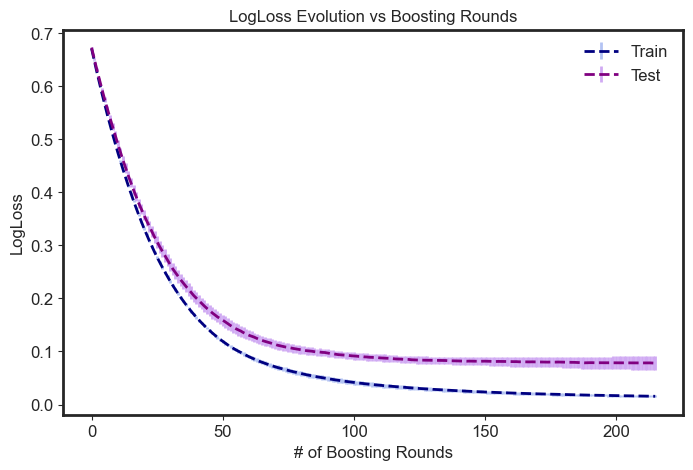

In [6]:
clf.plot_cv_results()

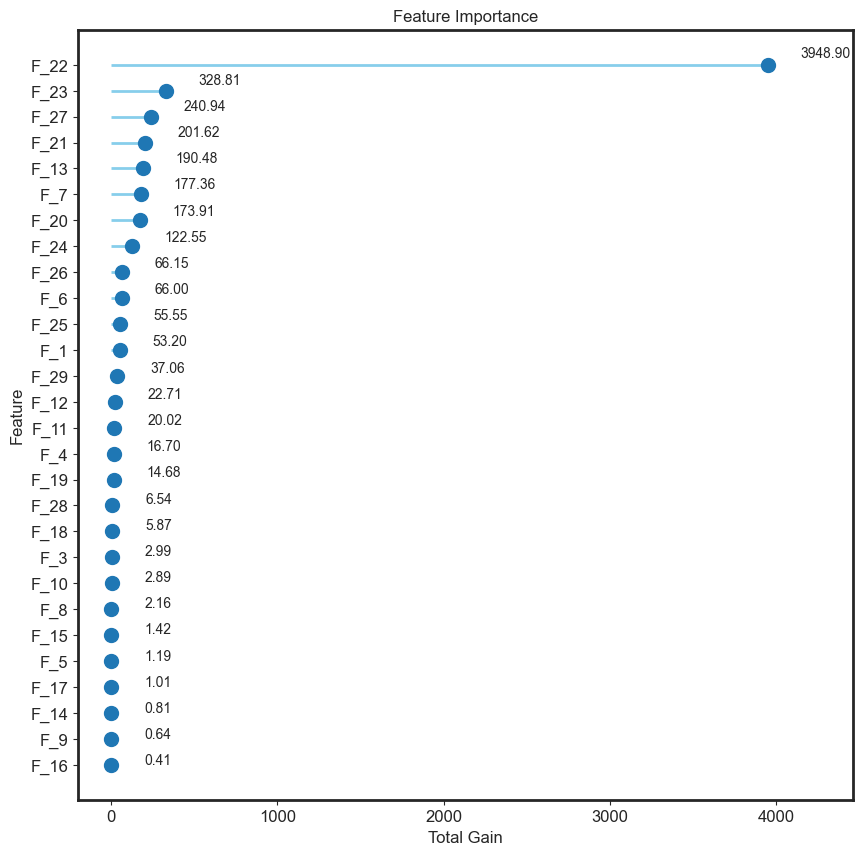

In [7]:
clf.plot_feature_importance(figsize=(10, 10))

In [8]:
# predic proba (or clf.y_pred_proba_)
# please note that y_test is optional
y_pred_proba = clf.predict_proba(X_test, y_test=None)
y_pred_proba[:10]

array([9.9908638e-01, 8.5003662e-04, 1.1916817e-03, 8.5492492e-01,
       9.2653575e-04, 1.6369838e-02, 9.9350041e-01, 9.9901831e-01,
       3.2486141e-01, 9.2059519e-04], dtype=float32)

In [9]:
# pred class (or clf.y_pred_)
# threshold can be set
y_pred = clf.predict(X_test, threshold=0.67)
y_pred[:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0])

In [10]:
# pred class (or clf.y_pred_)
# threshold can be set
y_pred = clf.predict(X_test, threshold=0.67)
y_pred[:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0])

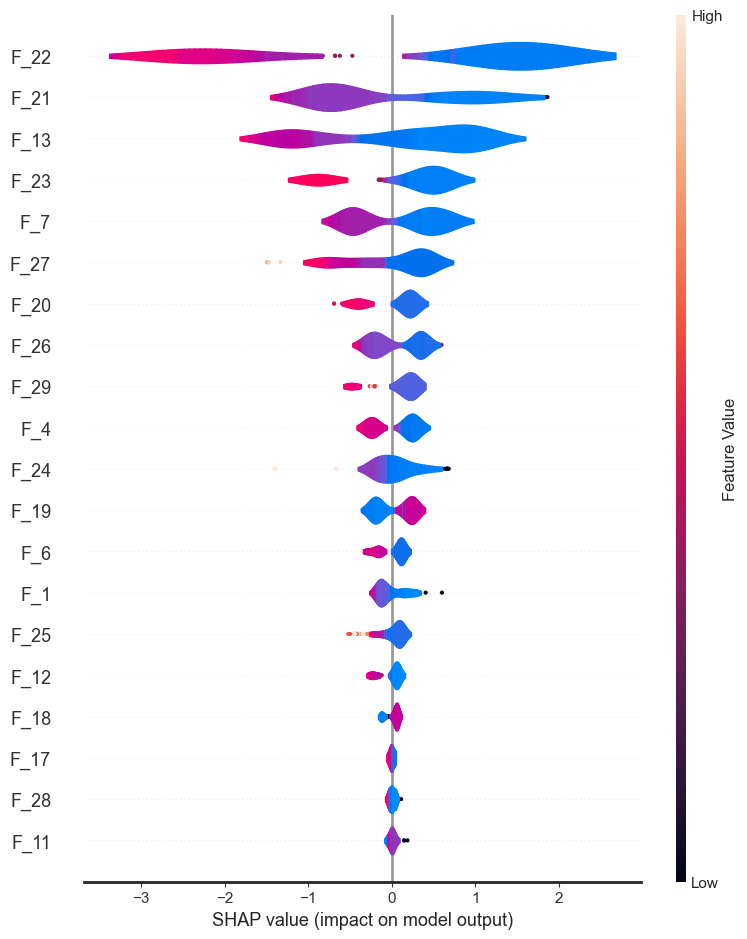

In [11]:
# shap summary plot violin on test data
clf.plot_shap_summary(plot_type="violin", validation=True)

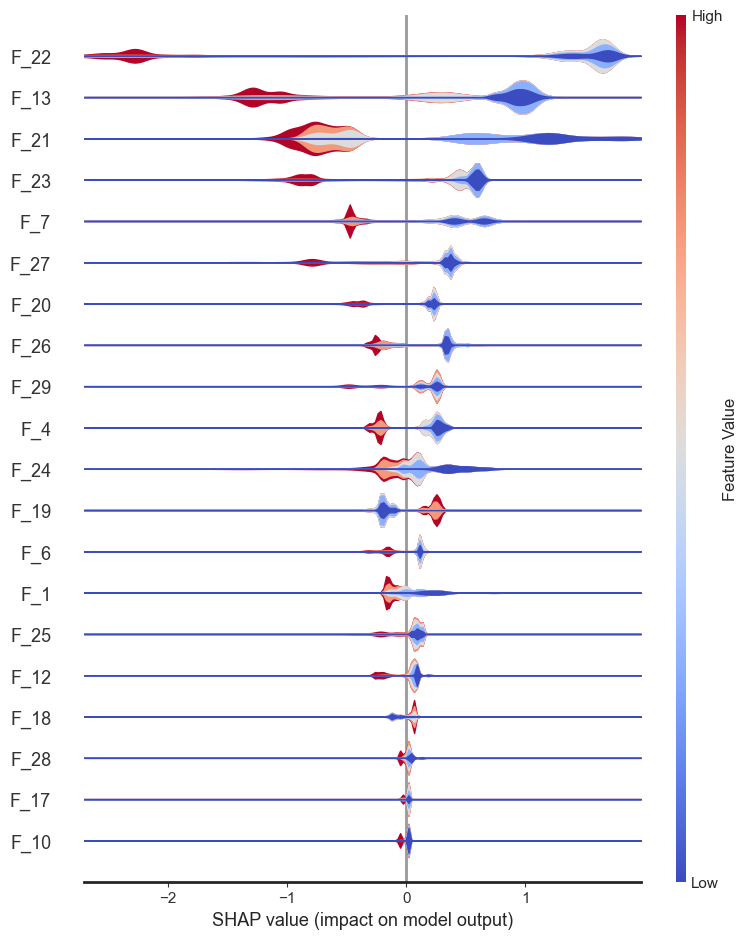

In [12]:
# shap summary plot layered violin plot on train data
clf.plot_shap_summary(
    plot_type="layered_violin",
    validation=False,
    layered_violin_max_num_bins=5,
)

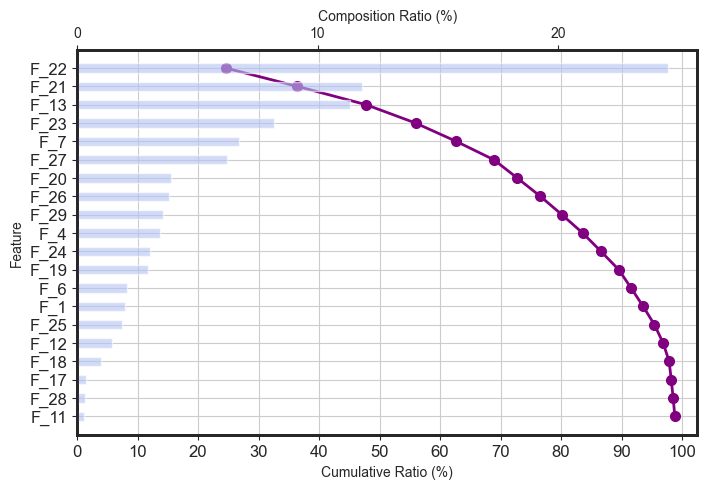

In [13]:
# shap waterfall plot
clf.plot_shap_waterfall()

In [14]:
clf.shap_values_test_[:10]

array([[ 0.00000000e+00,  4.59795538e-03,  0.00000000e+00,
         3.17117409e-03, -1.88170463e-01,  8.06317385e-03,
         1.12045236e-01,  4.33557481e-01, -3.50907724e-03,
         4.45637060e-03,  9.31751262e-03,  3.49932611e-02,
         5.67878895e-02,  1.09161818e+00,  2.55720429e-02,
        -1.03639029e-02, -5.96374506e-03,  2.27998346e-02,
         6.92017972e-02,  2.34770507e-01,  2.06246153e-01,
         5.49425542e-01,  1.72733712e+00,  6.41328394e-01,
        -4.39421237e-02,  1.25939578e-01,  3.46590310e-01,
         3.48326147e-01,  1.26167275e-02,  2.57031143e-01],
       [ 0.00000000e+00, -1.70386553e-01,  0.00000000e+00,
        -1.57158133e-02,  1.51262641e-01,  2.70095607e-03,
        -1.45038828e-01, -4.76342678e-01, -1.41286524e-02,
        -1.13599254e-02, -5.21755926e-02,  1.33642391e-03,
        -2.68707305e-01, -1.29700160e+00,  8.75540171e-03,
         1.39103122e-02,  9.47753713e-03, -3.36587653e-02,
         3.67830805e-02, -1.96537912e-01, -4.50182498e-

In [15]:
clf.shap_values_train_[:10]

array([[ 0.00000000e+00, -1.70107573e-01,  0.00000000e+00,
        -1.57158133e-02, -2.20021218e-01,  2.70095607e-03,
        -1.56570584e-01, -4.76342678e-01,  1.18995402e-02,
        -1.13599254e-02, -5.21755926e-02,  1.33642391e-03,
        -1.78072050e-01, -1.25088000e+00,  2.55720429e-02,
         1.39103122e-02,  9.47753713e-03,  2.01789550e-02,
         3.04628145e-02,  2.35049441e-01, -3.75885189e-01,
        -7.84310699e-01, -2.31381631e+00, -8.73555005e-01,
        -2.24202275e-01, -7.17923939e-02, -2.51751184e-01,
        -8.13881099e-01, -5.40543310e-02,  1.05900191e-01],
       [ 0.00000000e+00, -1.62427515e-01,  0.00000000e+00,
        -1.57158133e-02, -2.12738276e-01,  2.70095607e-03,
        -1.56570584e-01, -4.53691900e-01, -1.41286524e-02,
         1.65461022e-02, -5.21755926e-02,  1.33642391e-03,
        -2.17755511e-01, -1.29747009e+00,  2.55720429e-02,
         1.39103122e-02,  9.47753713e-03, -2.21704841e-02,
         5.15810512e-02,  2.76647478e-01, -3.75885189e-

In [16]:
# cv_results (or clf.cv_results_)
cvr = clf.get_cv_results()
cvr.tail()

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
211,0.015904,0.001689,0.078492,0.013021
212,0.015830,0.001668,0.078533,0.013067
213,0.015754,0.001663,0.078497,0.012959
214,0.015672,0.001637,0.078314,0.012931
215,0.015609,0.001626,0.078007,0.012915


In [17]:
# feature importance (or clf.feature_importance_)
clf.get_feature_importance()

,feature,total_gain
0,F_22,3948.900391
1,F_23,328.806732
2,F_27,240.937576
3,F_21,201.619629
4,F_13,190.478592
5,F_7,177.364319
6,F_20,173.909515
7,F_24,122.554771
8,F_26,66.153954
9,F_6,66.002426


In [18]:
clf.model_

## You can use the `BinaryClassificationMetrics` class to evaluate your model

In [19]:
from slickml.metrics import BinaryClassificationMetrics

metrics = BinaryClassificationMetrics(y_test, y_pred_proba)

/Users/amirhessam/Desktop/GitHub/slick-ml/.venv/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


,Accuracy,Balanced Accuracy,ROC AUC,PR AUC,Precision,Recall,Average Precision,F-1 Score,F-2 Score,F-0.50 Score,Threat Score,TP,TN,FP,FN
Threshold = 0.500 | Average = Binary,0.930000,0.925000,0.980000,0.987000,0.944000,0.944000,0.988000,0.944000,0.944000,0.944000,0.894000,101,58,6,6


/Users/amirhessam/Desktop/GitHub/slick-ml/.venv/lib/python3.9/site-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step


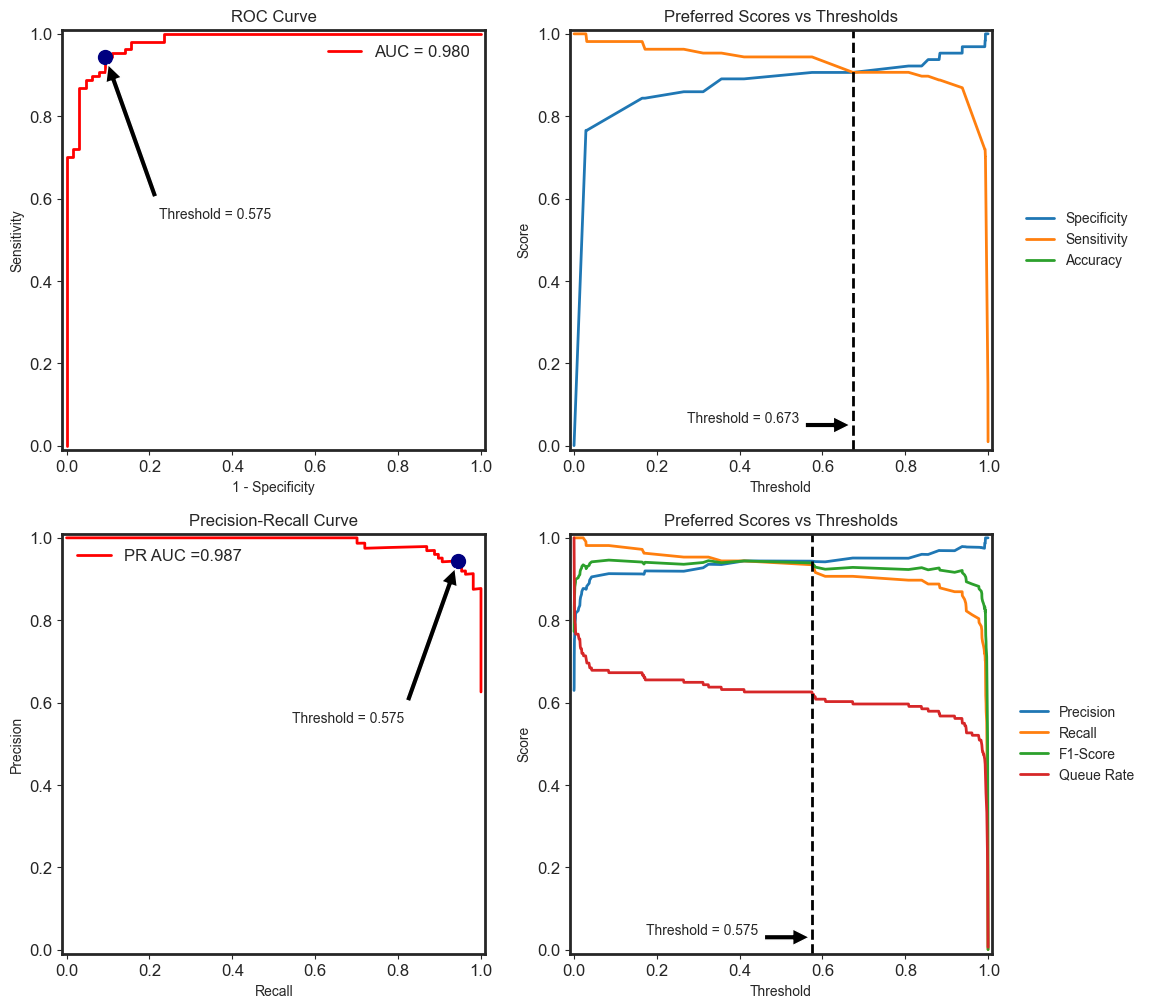

In [20]:
metrics.plot()

### Feel free to add your favorite `Example` via a `pull-request`.
### More details can be found in our [Contributing Document](https://github.com/slickml/slick-ml/blob/master/CONTRIBUTING.md).